In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('train.csv')
train_data.shape

(42000, 785)

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

Checking null values in train datasets

In [5]:
train_null_data =train_data.isnull().sum()
train_null_data=train_null_data[train_null_data>0].sort_values()
train_null_data

Series([], dtype: int64)

In [6]:
test_data=pd.read_csv('test.csv')
test_data.shape

(28000, 784)

In [7]:
test_null_data =test_data.isnull().sum()
test_null_data=test_null_data[test_null_data>0].sort_values()
test_null_data

Series([], dtype: int64)

It seems it doesn't have null data for train and test dataset 

In [8]:
Y_train=train_data['label']
X_train=train_data.drop(labels=["label"],axis=1)

<AxesSubplot:xlabel='label', ylabel='count'>

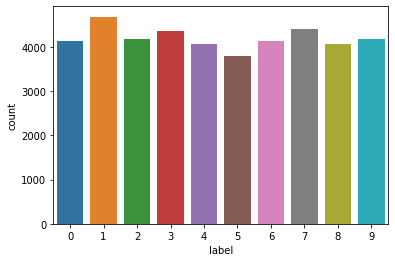

In [9]:
sns.countplot(Y_train)

Since the array of size is too large, try to divide the image by 255.0

In [10]:
X_train=X_train/ 255.0
X_test=test_data/ 255.0

Reshape the data

In [11]:
X_train=X_train.values.reshape(-1, 28, 28, 1)
X_test=X_test.values.reshape(-1, 28, 28, 1)

In [12]:
Y_train=to_categorical(Y_train, num_classes=10)

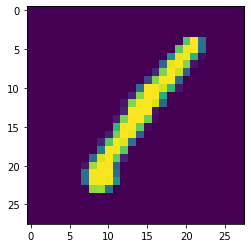

In [13]:
plt.imshow(X_train[0])

Draw graph for X_trian

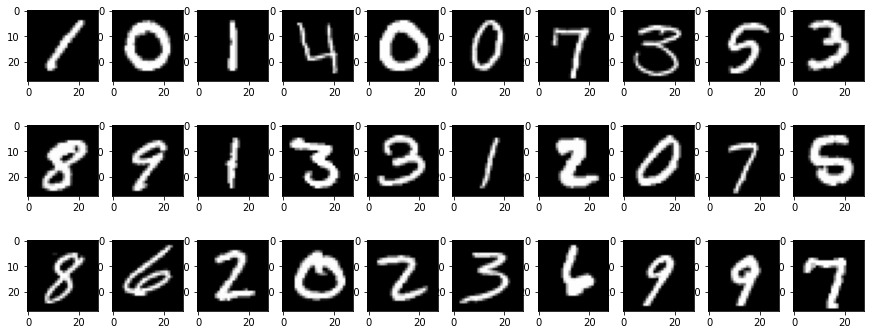

In [14]:
plt.figure(figsize=(15,6))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap='gray')
plt.show()

In [15]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(32, (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr=0.0001, rho=0.9,epsilon=1e-08,decay=0.00001), metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=512, epochs=50, verbose=1)

Epoch 1/50
83/83 [==============================] - 95s 1s/step - loss: 1.8857 - accuracy: 0.3423
Epoch 2/50
83/83 [==============================] - 104s 1s/step - loss: 0.9609 - accuracy: 0.6758
Epoch 3/50
83/83 [==============================] - 97s 1s/step - loss: 0.6303 - accuracy: 0.7943
Epoch 4/50
83/83 [==============================] - 108s 1s/step - loss: 0.4688 - accuracy: 0.8507
Epoch 5/50
83/83 [==============================] - 107s 1s/step - loss: 0.3752 - accuracy: 0.8821
Epoch 6/50
83/83 [==============================] - 105s 1s/step - loss: 0.3049 - accuracy: 0.9045
Epoch 7/50
83/83 [==============================] - 74s 891ms/step - loss: 0.2704 - accuracy: 0.9165
Epoch 8/50
83/83 [==============================] - 72s 863ms/step - loss: 0.2306 - accuracy: 0.9280
Epoch 9/50
83/83 [==============================] - 74s 886ms/step - loss: 0.2077 - accuracy: 0.9355
Epoch 10/50
83/83 [==============================] - 81s 975ms/step - loss: 0.1854 - accuracy: 0.9424
Epo

In [17]:
X_test=test_data/255.0
X_test=X_test.values
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
pred = model.predict_classes(X_test,verbose=1)
pred.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
875/875 [==============================] - 22s 25ms/step


(28000,)

In [18]:
sample_data=pd.read_csv('sample_submission.csv')
sample_data.shape

(28000, 2)

In [19]:
pd.DataFrame({"ImageId":list(range(1,len(pred)+1)),
              "Label":pred}).to_csv('result.csv',
                                           index=False,
                                           header=True)

In [20]:
result_data=pd.read_csv('result.csv')
result_data.shape

(28000, 2)